<a href="https://colab.research.google.com/github/harshitakilari/Streamflow-prediction/blob/main/sem8_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective variable of this problem is: the daily flow at the "Santa Coloma de Gramenet" gauging station.

The independent variables are the rainfall in the three stations that we have, the daily flows of the upstream gauging stations, and the historical data in the target station.

The algorithms that will be used to solve this problem are: Multiple Linear Regression,Logistic Regression, Support Vector Regressor, Random forest and KNeighbors Classifier .




The data schema is:

Date: daily data                                                                 
**Gramenet**: daily discharge at the "Santa Coloma de Gramenet" gauging station. Units are in m3/s                                                                
**Barcelona, Barcelona_fabra and Sabadell_aero**: daily rainfall in the "Barcelona", "Barcelona Fabra" and "Sabadell Aeropuerto" rain stations. Units are in mm                                                                               
**Garriga, Castellar, Llica, el_Mogent, Mogoda**: daily upstream flow discharge at the "La Garriga", "Castellar Valles", "Lliça de Vall", "Montornes Valles", "Santa Perpetua de Mogoda" gauging stations. Units are in m3/s

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#area of Interest

In [3]:
plt.rcParams['figure.figsize'] = (15, 7)

In [4]:
from google.colab import userdata
userdata.get('image1')

'/content/river basin.jpg'

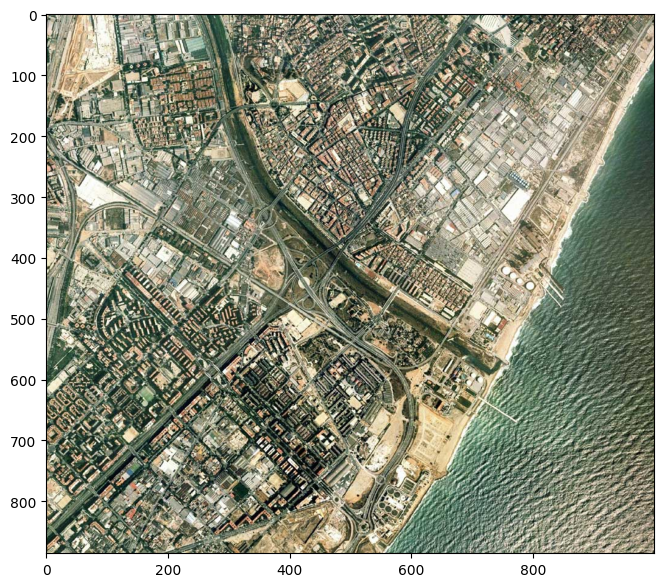

In [5]:
image1 = plt.imread("/content/river basin.jpg")
plt.imshow(image1)

In [6]:
from google.colab import userdata
userdata.get('image2')

'/content/besos.jpg'

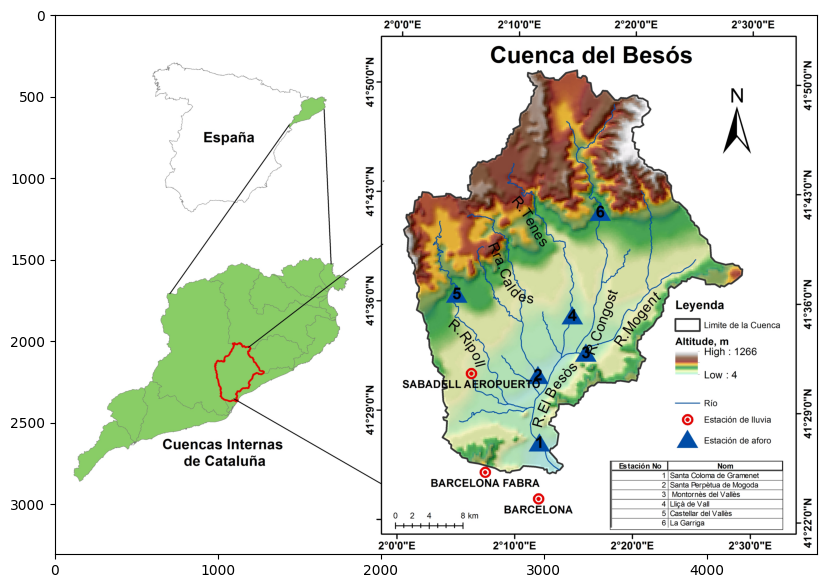

In [7]:
image2 = plt.imread("/content/besos.jpg")
plt.imshow(image2)

The difference between the daily discharge and daily upstream flow discharge is the amount of water that is stored in the river reach. This stored water can be due to various reasons such as:

**Rainfall**: The river reach can store rainfall water until it flows out of the reach.                                                                          
**Snowmelt**: The river reach can store snowmelt water until it flows out of the reach.                                                                          
**Groundwater recharge**: The river reach can store groundwater recharge water until it flows out of the reach.                                                 
**Evaporation**: The river reach can store evaporated water until it flows out of the reach.

*where from the above image 1(gramenet) is the daily discharge/outflow and others (Garriga, Castellar, Llica, el_Mogent, Mogoda) are daily upstream flow discharge/ inflow to the river basin.*

#data

In [8]:
from google.colab import userdata
userdata.get('Rainfalldata')

'/content/Copy of rainfall data edited(1).xlsx'

In [9]:
df=pd.read_excel("/content/Copy of rainfall data edited(1).xlsx", index_col= 'Date')
df

,year,Barcelona_fabra,Barcelona,Sabadell_aero,Garriga,Castellar,Llica,el_Mogent,Mogoda,Gramenet
Date,,,,,,,,,,
2003-01-01,2003,0.0,0.0,0.0,0.254,0.032700,0.155,0.398500,0.120,3.627500
2003-01-02,2003,0.0,0.0,0.0,0.254,0.028100,0.151,0.374500,0.106,3.947100
2003-01-03,2003,0.0,0.0,0.0,0.246,0.022500,0.145,0.375000,0.101,4.017400
2003-01-04,2003,0.0,0.0,0.0,0.251,0.030000,0.145,0.372000,0.099,3.931600
2003-01-05,2003,18.1,16.4,2.1,0.241,0.032800,0.146,0.368600,0.097,3.791300
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,2010,0.0,0.0,0.0,0.238,0.090177,0.130,0.380753,0.007,3.674486
2010-12-28,2010,0.0,0.0,0.0,0.234,0.090660,0.120,0.366378,0.004,3.666427
2010-12-29,2010,0.0,0.0,0.0,0.223,0.090462,0.111,0.342472,0.000,3.579455


#data cleaning

In [10]:
df.shape

(2922, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2003-01-01 to 2010-12-31
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             2922 non-null   int64  
 1   Barcelona_fabra  2922 non-null   float64
 2   Barcelona        2922 non-null   float64
 3   Sabadell_aero    2922 non-null   float64
 4   Garriga          2922 non-null   float64
 5   Castellar        2922 non-null   float64
 6   Llica            2922 non-null   float64
 7   el_Mogent        2922 non-null   float64
 8   Mogoda           2922 non-null   float64
 9   Gramenet         2922 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 251.1 KB


In [12]:
df.drop("year", axis=1, inplace= True)

In [13]:
df.head()


,Barcelona_fabra,Barcelona,Sabadell_aero,Garriga,Castellar,Llica,el_Mogent,Mogoda,Gramenet
Date,,,,,,,,,
2003-01-01,0.0,0.0,0.0,0.254,0.0327,0.155,0.3985,0.120,3.6275
2003-01-02,0.0,0.0,0.0,0.254,0.0281,0.151,0.3745,0.106,3.9471
2003-01-03,0.0,0.0,0.0,0.246,0.0225,0.145,0.3750,0.101,4.0174
2003-01-04,0.0,0.0,0.0,0.251,0.0300,0.145,0.3720,0.099,3.9316
2003-01-05,18.1,16.4,2.1,0.241,0.0328,0.146,0.3686,0.097,3.7913


#data visualization

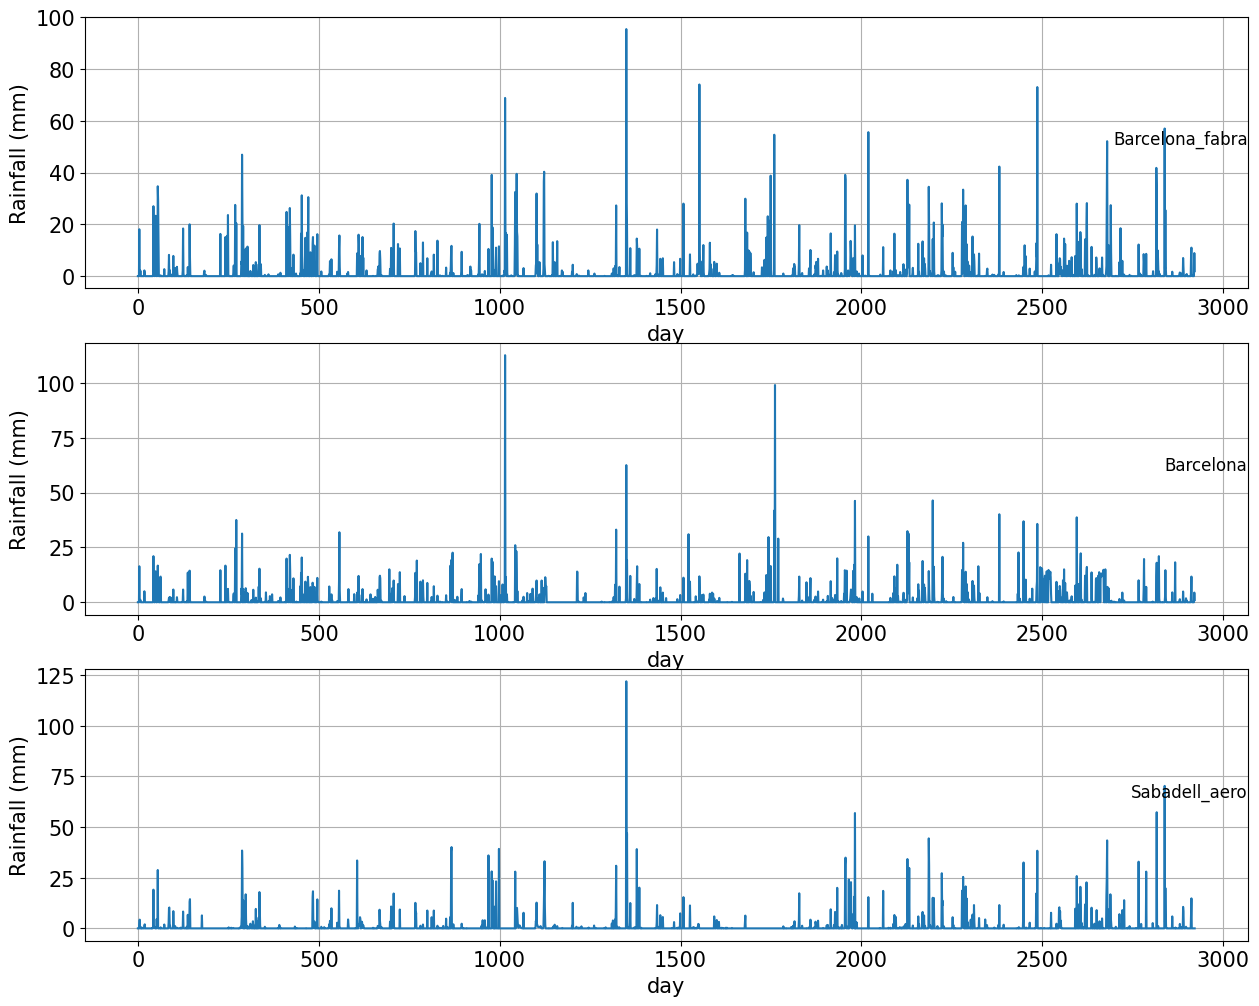

In [14]:
columns = [0, 1, 2]
i = 1
values = df.values
# define figure object and size
plt.figure(figsize=(15,12))
# plot each column with a for loop
for variable in columns:
     plt.subplot(len(columns), 1, i)
     plt.plot(values[:, variable])
     plt.xlabel('day',fontsize=15)
     plt.ylabel('Rainfall (mm)',fontsize=15)
     plt.title(df.columns[variable], y=0.5, loc='right')
     plt.tick_params(labelsize=15)
     plt.grid()
     plt.ioff()
     i += 1
plt.show()

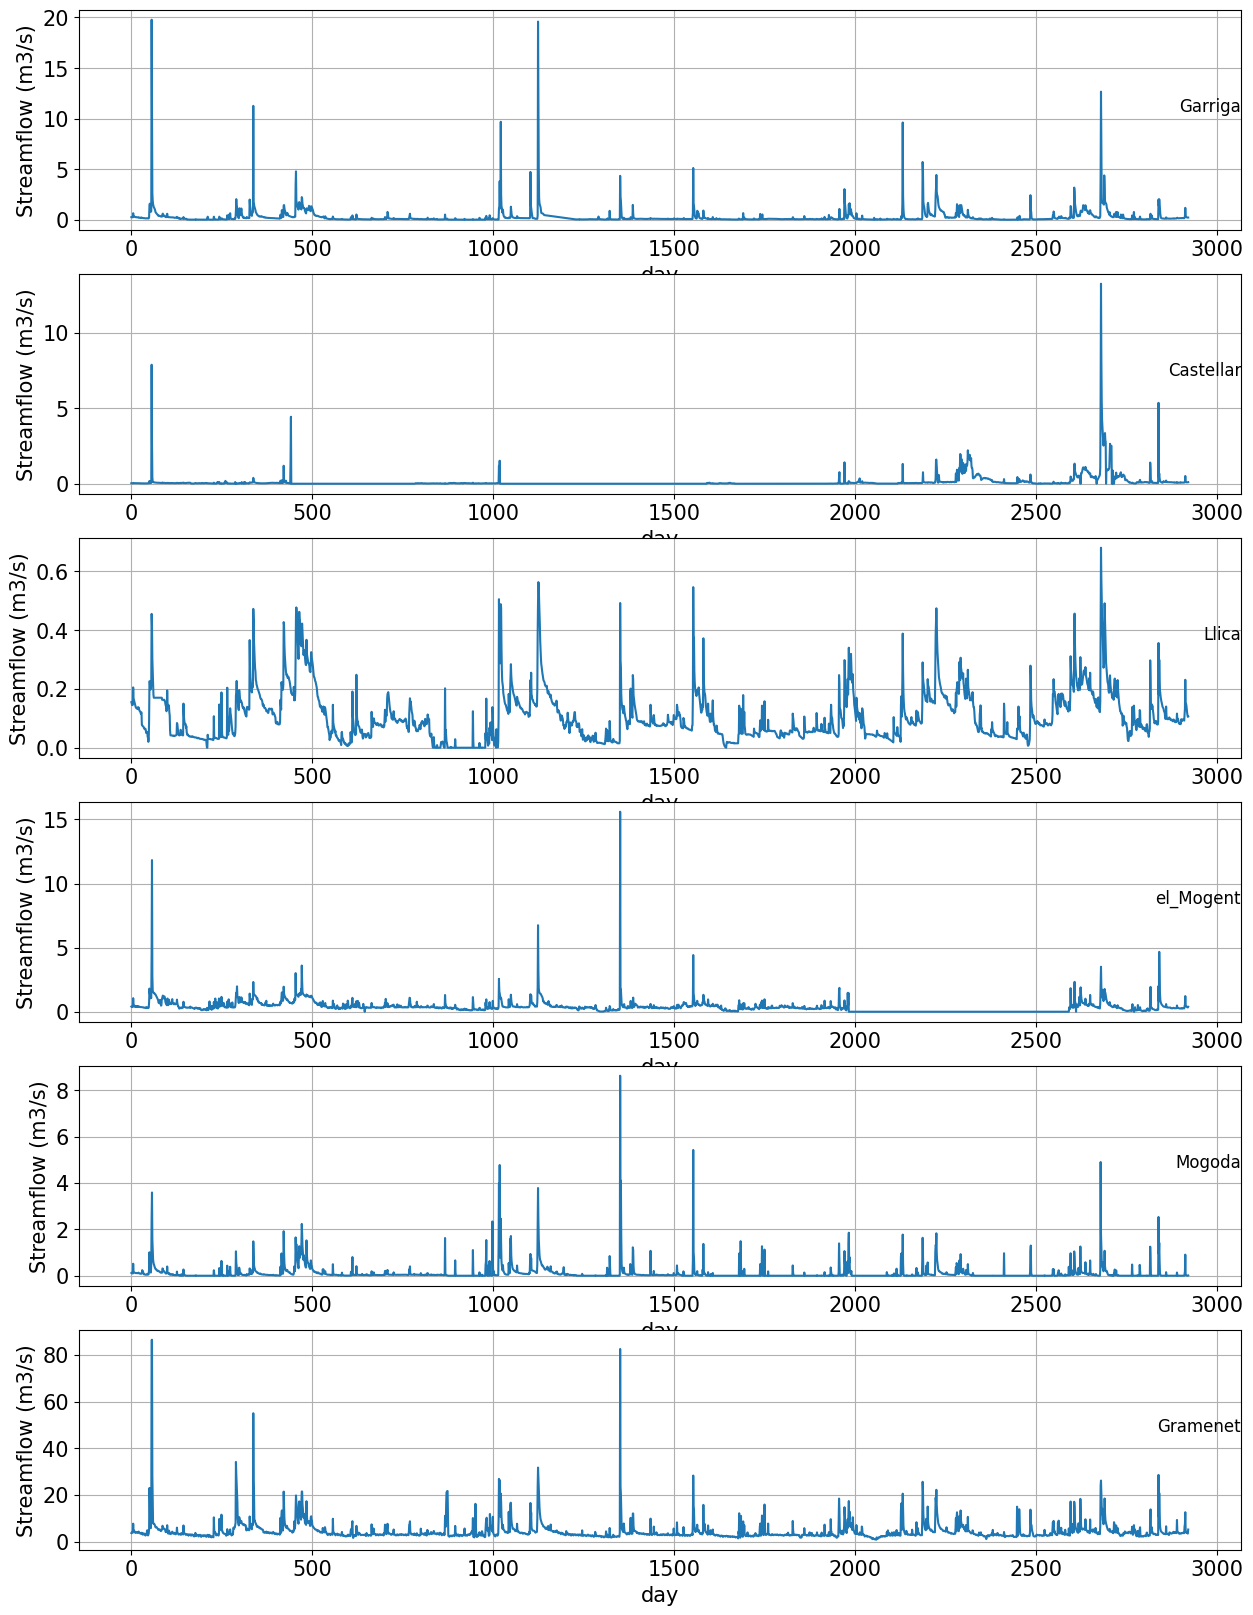

In [15]:
columns = [3,4,5,6,7,8]
i = 1
values = df.values
# define figure object and size
plt.figure(figsize=(15,20))
# plot each column with a for loop
for variable in columns:
     plt.subplot(len(columns), 1, i)
     plt.plot(values[:, variable])
     plt.xlabel('day',fontsize=15)
     plt.ylabel('Streamflow (m3/s)',fontsize=15)
     plt.title(df.columns[variable], y=0.5, loc='right')
     plt.tick_params(labelsize=15)
     plt.grid()
     plt.ioff()
     i += 1
plt.show()

#lag creation

In [16]:
#Lag creation
def lag_creation(df, lag_start, lag_end, columns, inplace=False, freq=1):
    if not inplace:
        df = df.copy()
    for col in columns:
        for i in range(lag_start, lag_end, freq):
            df["lag_"+str(i)+"_"+col] = df[col].shift(i)
    if not inplace:
        return df

#Encoding the cyclical properties of time
def date_features(df, inplace=False):
    if not inplace:
        df = df.copy()
    df.index = pd.to_datetime(df.index)
    df['day_sin'] = np.sin(df.index.dayofweek*(2.*np.pi/7))
    df['day_cos'] = np.cos(df.index.dayofweek*(2.*np.pi/7))
    df['month_sin'] = np.sin(df.index.dayofweek*(2.*np.pi/12))
    df['month_cos'] = np.cos(df.index.dayofweek*(2.*np.pi/12))
    if not inplace:
        return df

#Data normalization
from sklearn.preprocessing import MinMaxScaler
def Normalize_columns(df, columns, inplace=False):
    if not inplace:
        df = df.copy()
    sc = MinMaxScaler()
    df[columns] = sc.fit_transform(df[columns])
    if not inplace:
        return df

In [17]:
#Cross-correlation
def crosscorr(datax, datay, lag=0, wrap=False):

    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

In [18]:
df.head(200)

,Barcelona_fabra,Barcelona,Sabadell_aero,Garriga,Castellar,Llica,el_Mogent,Mogoda,Gramenet
Date,,,,,,,,,
2003-01-01,0.0,0.0,0.0,0.254,0.0327,0.155,0.3985,0.120,3.6275
2003-01-02,0.0,0.0,0.0,0.254,0.0281,0.151,0.3745,0.106,3.9471
2003-01-03,0.0,0.0,0.0,0.246,0.0225,0.145,0.3750,0.101,4.0174
2003-01-04,0.0,0.0,0.0,0.251,0.0300,0.145,0.3720,0.099,3.9316
2003-01-05,18.1,16.4,2.1,0.241,0.0328,0.146,0.3686,0.097,3.7913
...,...,...,...,...,...,...,...,...,...
2003-07-15,0.0,0.0,0.0,0.008,0.0528,0.030,0.1252,0.000,2.5575
2003-07-16,0.0,0.0,0.0,0.008,0.0492,0.029,0.1244,0.000,2.5430
2003-07-17,0.0,0.0,0.0,0.009,0.0447,0.029,0.1315,0.000,2.5551


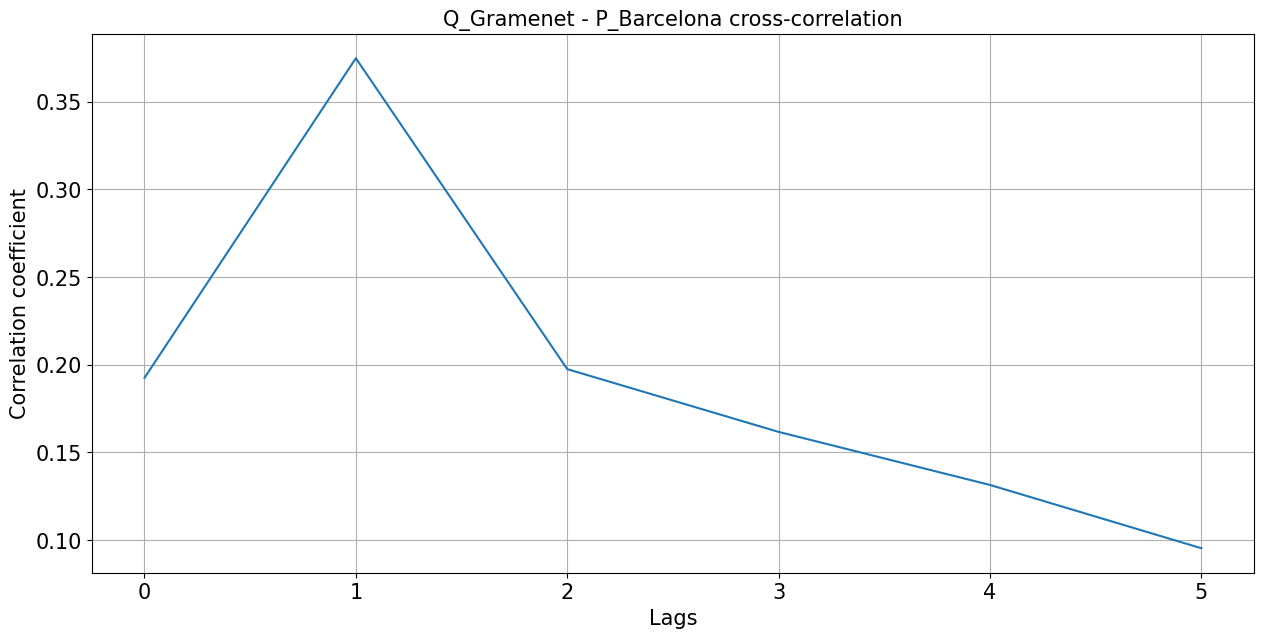

In [19]:
plt.plot(np.arange(0, 6), [crosscorr(df['Gramenet'], df['Barcelona'], lag) for lag in range(0, 6)])
plt.title('Q_Gramenet - P_Barcelona cross-correlation', fontsize=15)
plt.xlabel('Lags',fontsize=15)
plt.ylabel('Correlation coefficient',fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.ioff()
plt.show();

 modelling the flow discharge in the target station "Santa Coloma de Gramenet" without considering the historical flow in this gauging station, and by considering only one lag for each of the stations used.

In [20]:

freq=1

Normalize_columns(df, ['Barcelona', 'Barcelona_fabra', 'Sabadell_aero', 'Garriga', 'Llica', 'el_Mogent', 'Mogoda', 'Gramenet'], inplace=True)
lag_creation(df, 1, 2, ['Barcelona'], inplace=True, freq=freq)
lag_creation(df, 1, 2, ['Barcelona_fabra'], inplace=True, freq=freq)
lag_creation(df, 1, 2, ['Sabadell_aero'], inplace=True, freq=freq)
lag_creation(df, 1, 2, ['Garriga'], inplace=True, freq=freq)
lag_creation(df, 1, 2, ['Llica'], inplace=True, freq=freq)
lag_creation(df, 1, 2, ['el_Mogent'], inplace=True, freq=freq)
lag_creation(df, 1, 2, ['Mogoda'], inplace=True, freq=freq)
lag_creation(df, 1, 3, ['Gramenet'], inplace=True, freq=freq)
date_features(df, inplace=True)
df.dropna(inplace=True)


In [21]:
df

,Barcelona_fabra,Barcelona,Sabadell_aero,Garriga,Castellar,Llica,el_Mogent,Mogoda,Gramenet,lag_1_Barcelona,...,lag_1_Garriga,lag_1_Llica,lag_1_el_Mogent,lag_1_Mogoda,lag_1_Gramenet,lag_2_Gramenet,day_sin,day_cos,month_sin,month_cos
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-03,0.000000,0.000000,0.000000,0.012339,0.022500,0.213235,0.024030,0.011717,0.037945,0.000000,...,0.012744,0.222059,0.023998,0.012297,0.037125,0.033398,-0.433884,-0.900969,8.660254e-01,-5.000000e-01
2003-01-04,0.000000,0.000000,0.000000,0.012592,0.030000,0.213235,0.023838,0.011485,0.036945,0.000000,...,0.012339,0.213235,0.024030,0.011717,0.037945,0.037125,-0.974928,-0.222521,5.000000e-01,-8.660254e-01
2003-01-05,0.189727,0.145648,0.017227,0.012087,0.032800,0.214706,0.023620,0.011253,0.035308,0.000000,...,0.012592,0.213235,0.023838,0.011485,0.036945,0.037945,-0.781831,0.623490,1.224647e-16,-1.000000e+00
2003-01-06,0.010482,0.001776,0.035275,0.032467,0.055900,0.301471,0.067655,0.059861,0.080121,0.145648,...,0.012087,0.214706,0.023620,0.011253,0.035308,0.036945,0.000000,1.000000,0.000000e+00,1.000000e+00
2003-01-07,0.000000,0.004440,0.000000,0.015930,0.039000,0.247059,0.038448,0.021926,0.044918,0.001776,...,0.032467,0.301471,0.067655,0.059861,0.080121,0.035308,0.781831,0.623490,5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0.000000,0.000000,0.000000,0.011935,0.090177,0.191176,0.024399,0.000812,0.033946,0.000000,...,0.012542,0.211765,0.025147,0.001624,0.034731,0.037770,0.000000,1.000000,0.000000e+00,1.000000e+00
2010-12-28,0.000000,0.000000,0.000000,0.011733,0.090660,0.176471,0.023477,0.000464,0.033852,0.000000,...,0.011935,0.191176,0.024399,0.000812,0.033946,0.034731,0.781831,0.623490,5.000000e-01,8.660254e-01
2010-12-29,0.000000,0.000000,0.000000,0.011176,0.090462,0.163235,0.021945,0.000000,0.032837,0.000000,...,0.011733,0.176471,0.023477,0.000464,0.033852,0.033946,0.974928,-0.222521,8.660254e-01,5.000000e-01


#importing all the libraries
train-test-split

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
df.index = pd.to_datetime(df.index)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2003-01-03 to 2010-12-31
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Barcelona_fabra        2920 non-null   float64
 1   Barcelona              2920 non-null   float64
 2   Sabadell_aero          2920 non-null   float64
 3   Garriga                2920 non-null   float64
 4   Castellar              2920 non-null   float64
 5   Llica                  2920 non-null   float64
 6   el_Mogent              2920 non-null   float64
 7   Mogoda                 2920 non-null   float64
 8   Gramenet               2920 non-null   float64
 9   lag_1_Barcelona        2920 non-null   float64
 10  lag_1_Barcelona_fabra  2920 non-null   float64
 11  lag_1_Sabadell_aero    2920 non-null   float64
 12  lag_1_Garriga          2920 non-null   float64
 13  lag_1_Llica            2920 non-null   float64
 14  lag_1_el_Mogent        2920 non-null  

In [25]:
X = df.drop('Gramenet', axis=1)
y = df['Gramenet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

Comparing the performance of the regression models.

#Support vector regressor

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
param_grid = {
    'C': [0.1, 1, 10, 100,1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}



In [29]:
svr = SVR(kernel='rbf')

In [30]:
from sklearn.model_selection import KFold, cross_val_score

In [31]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [32]:
best_score = -np.inf
best_params = None

In [33]:

for C in param_grid['C']:
    for gamma in param_grid['gamma']:
            svr = SVR( C=C, gamma=gamma)
            scores = cross_val_score(svr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
            average_score = np.mean(scores)
            if average_score > best_score:
                best_score = average_score
                best_params = { 'C': C, 'gamma': gamma}

print(f'Best parameters: {best_params}')
print(f'Best score: {-best_score}')

Best parameters: {'C': 1000, 'gamma': 0.01}
Best score: 0.0023295391574644246


In [34]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.0001, gamma=0.1)
svr_model.fit(X_train, y_train)

SVR(C=100, epsilon=0.0001, gamma=0.1)

In [35]:
y_pred = svr_model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
print(round(mse,4))

0.0004


The R2 score ranges from 0 to 1, where a score of 1 indicates that the model perfectly predicts the dependent variable.

In [37]:
r2 = r2_score(y_test, y_pred)
print(round(r2,4))

0.8517


In [38]:
!pip install hydroeval
import hydroeval as he

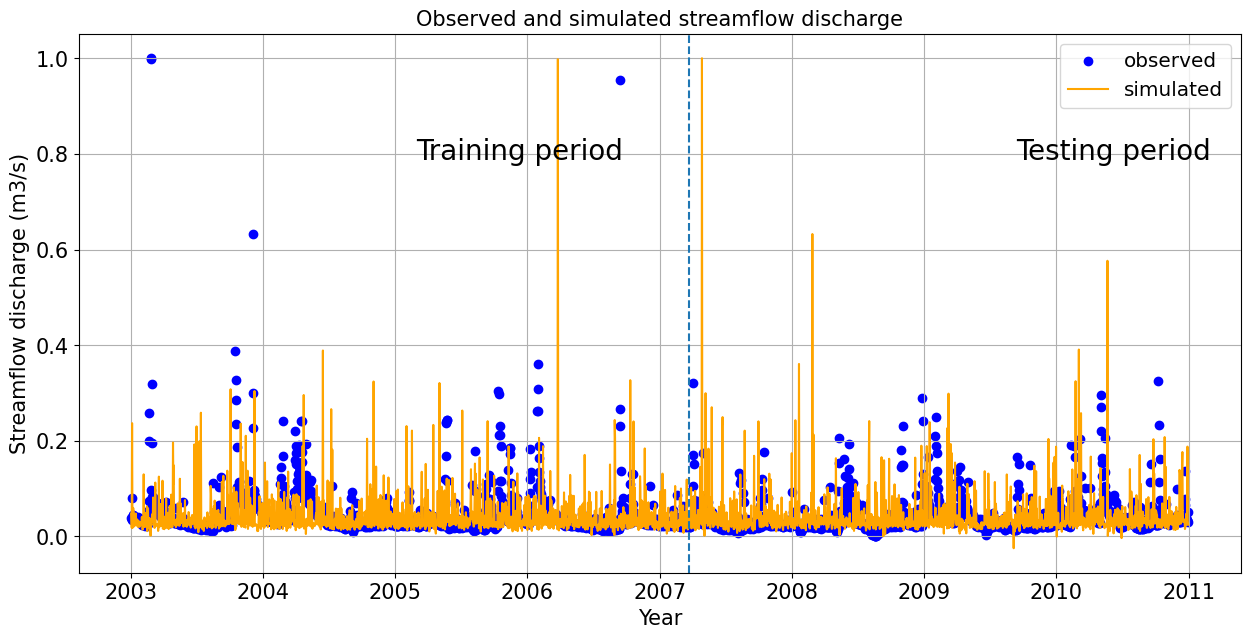

<Figure size 700x1500 with 0 Axes>

In [39]:
# Hydrograph plot for both training and test periods
plt.scatter(df.iloc[int(len(df)*0.80):].index, df.iloc[int(len(df)*0.80):].Gramenet, color ='b', label= "observed")
plt.scatter(df.iloc[:int(len(df)*0.80)].index, df.iloc[:int(len(df)*0.80)].Gramenet, color ='b')
plt.plot(df.iloc[int(len(df)*0.80):].index, y_pred, 'orange', label="simulated")
plt.plot(df.iloc[:int(len(df)*0.80)].index, y_train, 'orange')
plt.axvline(13596, 0, 80, linestyle='--')
plt.figtext(0.75, 0.7, "Testing period", fontsize = 20)
plt.figtext(0.35, 0.7, "Training period", fontsize = 20)
plt.title("Observed and simulated streamflow discharge", fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Streamflow discharge (m3/s)',fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.legend(fontsize="x-large")
plt.figure(figsize=(7,15))
plt.show()

#Linear Regression

In [40]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred1 = reg.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred1)
print(round(mse,4))

0.0003


In [43]:
r2 = r2_score(y_test, y_pred1)
print(round(r2,4))

0.9113


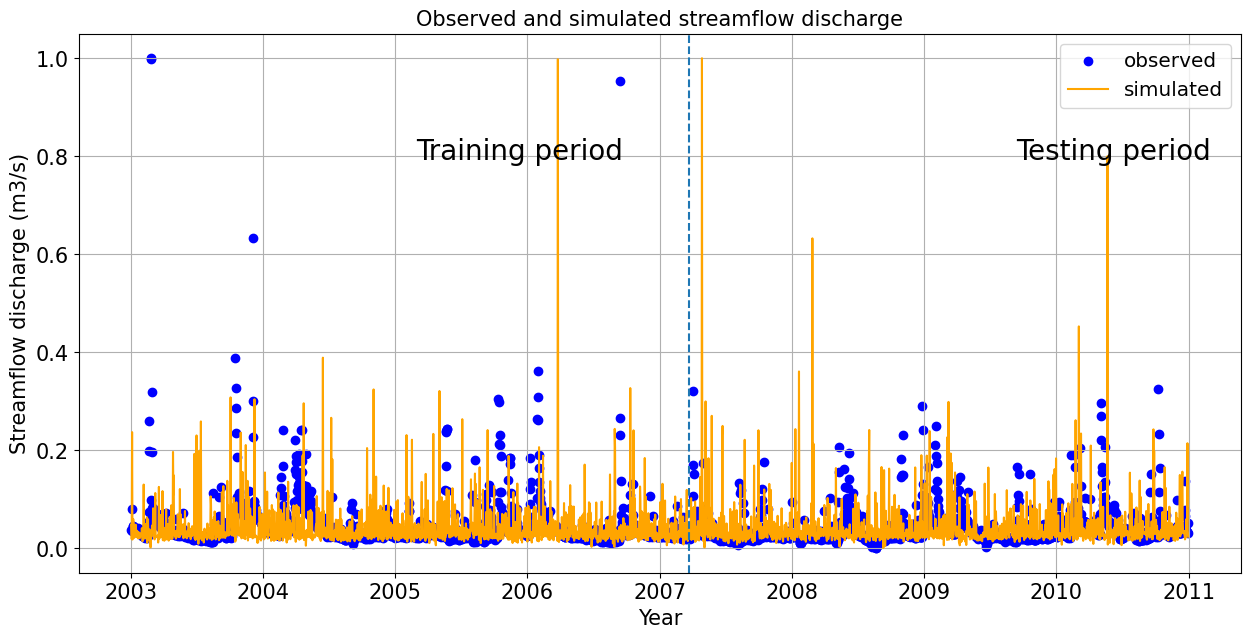

In [44]:
plt.scatter(df.iloc[int(len(df)*0.80):].index, df.iloc[int(len(df)*0.80):].Gramenet, color ='b', label= "observed")
plt.scatter(df.iloc[:int(len(df)*0.80)].index, df.iloc[:int(len(df)*0.80)].Gramenet, color ='b')
plt.plot(df.iloc[int(len(df)*0.80):].index, y_pred1, 'orange', label="simulated")
plt.plot(df.iloc[:int(len(df)*0.80)].index, y_train, 'orange')
plt.axvline(13596, 0, 80, linestyle='--')
plt.figtext(0.75, 0.7, "Testing period", fontsize = 20)
plt.figtext(0.35, 0.7, "Training period", fontsize = 20)
plt.title("Observed and simulated streamflow discharge", fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Streamflow discharge (m3/s)',fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.legend(fontsize="x-large")
plt.show()

In [45]:
Intercept=reg.intercept_
Intercept

0.0063066513917869535

#Random forest regressor


In [46]:
#RFR hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20]
}

In [47]:
rfr = RandomForestRegressor(random_state=42)

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [49]:
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [50]:
best_params = grid_search.best_params_

In [51]:
rfr_model = RandomForestRegressor(**best_params, random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [52]:
y_pred2 = rfr_model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred2)
print(round(mse,4))

0.0007


In [54]:
r2 = r2_score(y_test, y_pred2)
print(round(r2,4))

0.7551


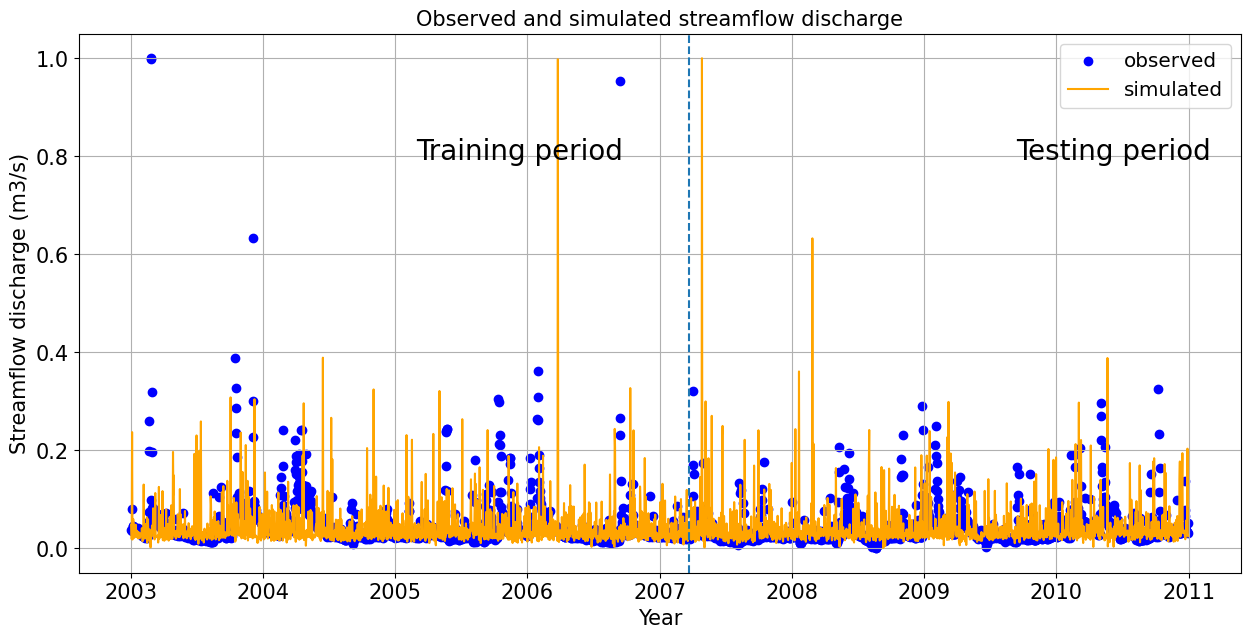

In [55]:
# Hydrograph plot for both training and test periods
plt.scatter(df.iloc[int(len(df)*0.80):].index, df.iloc[int(len(df)*0.80):].Gramenet, color ='b', label= "observed")
plt.scatter(df.iloc[:int(len(df)*0.80)].index, df.iloc[:int(len(df)*0.80)].Gramenet, color ='b')
plt.plot(df.iloc[int(len(df)*0.80):].index, y_pred2, 'orange', label="simulated")
plt.plot(df.iloc[:int(len(df)*0.80)].index, y_train, 'orange')
plt.axvline(13596, 0, 80, linestyle='--')
plt.figtext(0.75, 0.7, "Testing period", fontsize = 20)
plt.figtext(0.35, 0.7, "Training period", fontsize = 20)
plt.title("Observed and simulated streamflow discharge", fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Streamflow discharge (m3/s)',fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.legend(fontsize="x-large")
plt.show()

#result

The performance comparison of the results revealed that the MLR model outperformed the other models in predicting daily flow